<a href="https://colab.research.google.com/github/jsChaparroj/BigData/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 Primer Corte 2022 II

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
netflix = pd.read_csv("/content/drive/MyDrive/V semestre/BigData/1erCorte/Netflix subscription fee Dec-2021.csv",
                        sep =";")
continente = pd.read_csv("/content/drive/MyDrive/V semestre/BigData/1erCorte/Libro1.csv",sep=";",encoding="latin")
continente.head()
netflix = pd.merge(netflix,continente,how="inner",left_on="Country",right_on="Country or Area")
netflix.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,ar,Argentina,4760.0,3154.0,1606.0,3.74,6.30,9.26,11,Argentina,ARG,32,South America,Latin America and the Caribbean,South America
1,au,Australia,6114.0,4050.0,2064.0,7.84,12.12,16.39,14,Australia,AUS,36,Australia and New Zealand,NaN,Oceania
2,at,Austria,5640.0,3779.0,1861.0,9.03,14.67,20.32,15,Austria,AUT,40,Western Europe,NaN,Europe
3,be,Belgium,NaN,3374.0,1616.0,10.16,15.24,20.32,22,Belgium,BEL,56,Western Europe,NaN,Europe
4,br,Brazil,4972.0,3162.0,1810.0,4.61,7.11,9.96,32,Brazil,BRA,76,South America,Latin America and the Caribbean,South America


In [24]:
netflix.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,ar,Argentina,4760.0,3154.0,1606.0,3.74,6.30,9.26,11,Argentina,ARG,32,South America,Latin America and the Caribbean,South America
1,au,Australia,6114.0,4050.0,2064.0,7.84,12.12,16.39,14,Australia,AUS,36,Australia and New Zealand,NaN,Oceania
2,at,Austria,5640.0,3779.0,1861.0,9.03,14.67,20.32,15,Austria,AUT,40,Western Europe,NaN,Europe
3,be,Belgium,NaN,3374.0,1616.0,10.16,15.24,20.32,22,Belgium,BEL,56,Western Europe,NaN,Europe
4,br,Brazil,4972.0,3162.0,1810.0,4.61,7.11,9.96,32,Brazil,BRA,76,South America,Latin America and the Caribbean,South America


In [25]:
netflix.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),No,M49 Code
count,53.000000,54.000000,54.000000,55.000000,53.000000,55.000000,56.000000,56.000000
mean,5349.509434,3551.648148,1781.944444,8.357455,12.172264,15.561455,122.964286,416.357143
std,1040.508578,753.986541,349.017890,2.094488,3.054501,4.016359,64.611838,231.881822
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000,11.000000,32.000000
25%,4948.000000,3154.000000,1613.750000,7.875000,10.710000,13.540000,72.750000,229.250000
50%,5336.000000,3540.500000,1839.500000,9.030000,11.870000,14.760000,113.500000,378.000000
75%,6114.000000,4038.250000,1979.500000,9.030000,14.670000,18.800000,174.500000,610.000000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000,240.000000,858.000000


In [26]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   56 non-null     object 
 1   Country                        56 non-null     object 
 2   Total Library Size             53 non-null     float64
 3   No. of TV Shows                54 non-null     float64
 4   No. of Movies                  54 non-null     float64
 5   Cost Per Month - Basic ($)     55 non-null     float64
 6   Cost Per Month - Standard ($)  53 non-null     float64
 7   Cost Per Month - Premium ($)   55 non-null     float64
 8   No                             56 non-null     int64  
 9   Country or Area                56 non-null     object 
 10  ISO-alpha3 Code                56 non-null     object 
 11  M49 Code                       56 non-null     int64  
 12  Region 1                       56 non-null     objec

### Valores ausentes

In [38]:
valores_nas = netflix.isnull().sum()
valores_nas = pd.DataFrame({"Cantidad":valores_nas} )
valores_nas["porcentaje"] = round(netflix.isnull().sum()/len(netflix),2)
valores_nas = valores_nas[valores_nas['Cantidad']>0]
valores_nas.head(10)

,Cantidad,porcentaje
Total Library Size,3,0.05
No. of TV Shows,2,0.04
No. of Movies,2,0.04
Cost Per Month - Basic ($),1,0.02
Cost Per Month - Standard ($),3,0.05
Cost Per Month - Premium ($),1,0.02
Region 2,43,0.77


Text(0.5, 0, 'Cantidad')

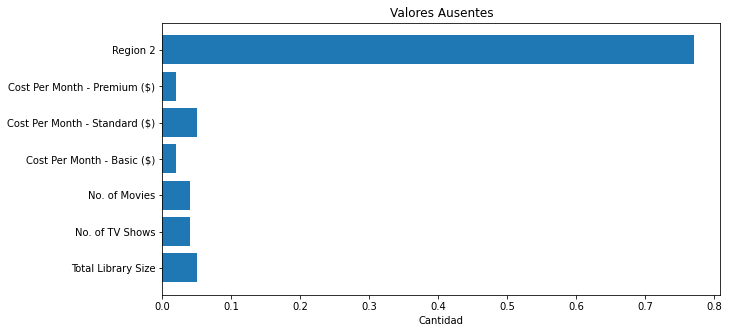

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(y = valores_nas.index , width= valores_nas['porcentaje'])
ax.set_title("Valores Ausentes")
ax.set_xlabel("Cantidad")

### 2. Hacer imputación de datos con las siguientes opciones:


#### 1. Omitir las filas con observaciones NA


In [40]:
punto2_1 = netflix.dropna(how="any" )
print(len(netflix))
print(len(punto2_1))

56
8


In [41]:
punto2_1.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
No                               0
Country or Area                  0
ISO-alpha3 Code                  0
M49 Code                         0
Region 1                         0
Region 2                         0
Continent                        0
dtype: int64

#### 2. Imputar con la media

In [42]:
medias = netflix.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [43]:
datos2_2  = netflix.fillna(medias)
medias

Total Library Size               5349.509434
No. of TV Shows                  3551.648148
No. of Movies                    1781.944444
Cost Per Month - Basic ($)          8.357455
Cost Per Month - Standard ($)      12.172264
Cost Per Month - Premium ($)       15.561455
No                                122.964286
M49 Code                          416.357143
dtype: float64

In [44]:
datos2_2.isnull().sum()

Country_code                      0
Country                           0
Total Library Size                0
No. of TV Shows                   0
No. of Movies                     0
Cost Per Month - Basic ($)        0
Cost Per Month - Standard ($)     0
Cost Per Month - Premium ($)      0
No                                0
Country or Area                   0
ISO-alpha3 Code                   0
M49 Code                          0
Region 1                          0
Region 2                         43
Continent                         0
dtype: int64

In [ ]:
datos2_2.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760.000000,3154.0,1606.0,3.74,6.30,9.26
1,au,Australia,6114.000000,4050.0,2064.0,7.84,12.12,16.39
2,at,Austria,5640.000000,3779.0,1861.0,9.03,14.67,20.32
3,be,Belgium,5330.112903,3374.0,1616.0,10.16,15.24,20.32
4,bo,Bolivia,4991.000000,3155.0,1836.0,7.99,10.99,13.99


#### 3. Imputar con la mediana

In [45]:
mediana = netflix.median()
mediana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Total Library Size               5336.00
No. of TV Shows                  3540.50
No. of Movies                    1839.50
Cost Per Month - Basic ($)          9.03
Cost Per Month - Standard ($)      11.87
Cost Per Month - Premium ($)       14.76
No                                113.50
M49 Code                          378.00
dtype: float64

In [46]:
datos2_3 = netflix.fillna(mediana)
datos2_3.isnull().sum()

Country_code                      0
Country                           0
Total Library Size                0
No. of TV Shows                   0
No. of Movies                     0
Cost Per Month - Basic ($)        0
Cost Per Month - Standard ($)     0
Cost Per Month - Premium ($)      0
No                                0
Country or Area                   0
ISO-alpha3 Code                   0
M49 Code                          0
Region 1                          0
Region 2                         43
Continent                         0
dtype: int64

 #### 4.Reemplazar NAs por cero

In [47]:
datos2_4 = netflix.fillna(0)
datos2_4.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,ar,Argentina,4760.0,3154.0,1606.0,3.74,6.30,9.26,11,Argentina,ARG,32,South America,Latin America and the Caribbean,South America
1,au,Australia,6114.0,4050.0,2064.0,7.84,12.12,16.39,14,Australia,AUS,36,Australia and New Zealand,0,Oceania
2,at,Austria,5640.0,3779.0,1861.0,9.03,14.67,20.32,15,Austria,AUT,40,Western Europe,0,Europe
3,be,Belgium,0.0,3374.0,1616.0,10.16,15.24,20.32,22,Belgium,BEL,56,Western Europe,0,Europe
4,br,Brazil,4972.0,3162.0,1810.0,4.61,7.11,9.96,32,Brazil,BRA,76,South America,Latin America and the Caribbean,South America


### 3. Seleccionar la mejor opción para los puntos siguientes:

#### 1. Analizar, por continente, empleando las funciones que se indican en la siguiente diapositiva.


El dataset seleccionado solo contiene una observación por país,por lo cual agrupar los valores no tendría mucho sentido.

**Para Variables cualitaticas**: 


In [48]:
datos2_3.select_dtypes("object").describe()

,Country_code,Country,Country or Area,ISO-alpha3 Code,Region 1,Region 2,Continent
count,56,56,56,56,56,13,56
unique,56,56,56,56,13,2,6
top,ar,Argentina,Argentina,ARG,Northern Europe,Latin America and the Caribbean,Europe
freq,1,1,1,1,9,12,31


**Para variables continuas**

In [49]:
datos2_3.select_dtypes("float").describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,5348.785714,3551.250000,1784.000000,8.369464,12.156071,15.547143
std,1011.737834,740.153694,342.782823,2.077305,2.970822,3.981120
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4966.000000,3154.000000,1615.250000,7.892500,10.920000,13.540000
50%,5336.000000,3540.500000,1839.500000,9.030000,11.870000,14.760000
75%,6091.500000,4014.750000,1978.500000,9.030000,14.317500,18.430000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [68]:
datos2_3.groupby("Continent").mean().sort_values("Total Library Size")

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),No,M49 Code
Continent,,,,,,,,
South America,5021.625000,3204.062500,1779.250000,6.388750,9.690000,12.196250,99.375000,338.750000
North America,5195.200000,3385.800000,1811.000000,7.900000,11.454000,14.648000,88.400000,291.200000
Europe,5365.387097,3658.016129,1692.548387,9.314839,13.562258,17.379677,124.677419,420.709677
Asia,5458.000000,3463.444444,1994.555556,7.380000,10.164444,12.794444,156.000000,534.222222
Africa,5736.000000,3686.000000,2050.000000,6.260000,10.050000,12.580000,208.000000,710.000000
Oceania,6099.000000,4026.500000,2072.500000,8.320000,11.995000,16.665000,86.000000,295.000000


In [69]:
datos2_3.groupby("Continent").median().sort_values("Total Library Size")

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),No,M49 Code
Continent,,,,,,,,
North America,4989.0,3154.0,1839.5,7.99,10.990,14.240,96.0,320.0
South America,4990.0,3155.5,1833.0,6.59,10.450,11.875,60.5,194.0
Europe,5376.0,3604.0,1841.0,9.03,13.540,18.060,114.0,380.0
Asia,5713.0,3619.0,2063.0,8.34,10.650,12.960,135.0,458.0
Africa,5736.0,3686.0,2050.0,6.26,10.050,12.580,208.0,710.0
Oceania,6099.0,4026.5,2072.5,8.32,11.995,16.665,86.0,295.0


In [87]:
datos2_3.columns
a = ['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']

datos2_3.groupby("Continent")[a].apply(lambda x:  np.std(x)/np.mean(x))


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,,,,
Africa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Asia,0.141758,0.154530,0.137009,0.385063,0.336402,0.346008
Europe,0.229061,0.242324,0.231768,0.149235,0.176072,0.198899
North America,0.101825,0.136631,0.057962,0.095447,0.078201,0.052698
Oceania,0.002459,0.005836,0.004101,0.057692,0.010421,0.016502
South America,0.039946,0.039695,0.050848,0.292769,0.249547,0.192922


In [88]:
datos2_3.groupby("Continent")["Continent"].count()

Continent
Africa            1
Asia              9
Europe           31
North America     5
Oceania           2
South America     8
Name: Continent, dtype: int64

#### Realizar tres (3) diagramas de caja empleando seaborn.boxplot

Text(0.5, 1.0, 'Tamaño total de la biblioteca')

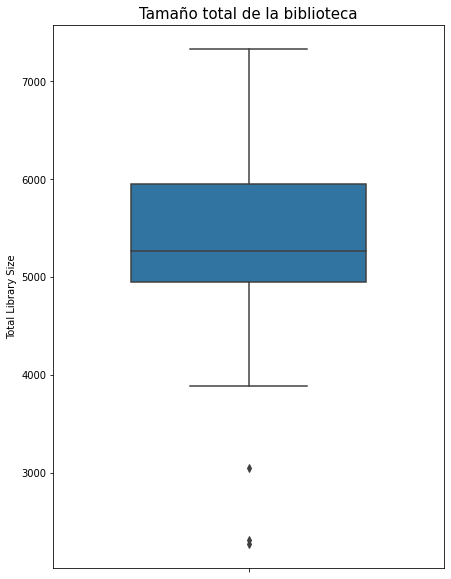

In [ ]:
fig1, ax = plt.subplots(figsize=(7,10))
sns.boxplot(data = datos2_3 , y ="Total Library Size", width=0.6,ax=ax)
ax.set_title("Tamaño total de la biblioteca",size=15)


Text(0.5, 1.0, 'Número de peliculas')

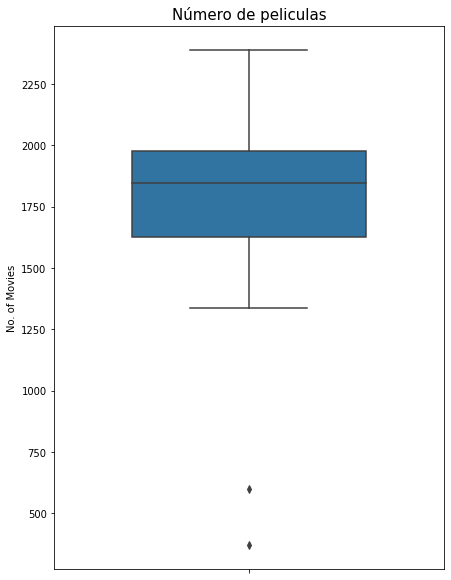

In [ ]:
fig2, ax2 = plt.subplots(figsize=(7,10))
sns.boxplot(data = datos2_3 , y ="No. of Movies", width=0.6,ax=ax2)
ax2.set_title("Número de peliculas",size=15)


Text(0.5, 1.0, 'No. of TV Shows')

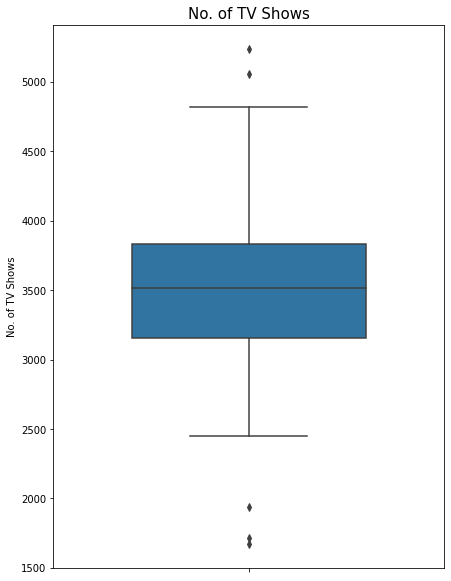

In [ ]:
fig3, ax2 = plt.subplots(figsize=(7,10))
sns.boxplot(data = datos2_3 , y ="No. of TV Shows", width=0.6,ax=ax2)
ax2.set_title("No. of TV Shows",size=15)

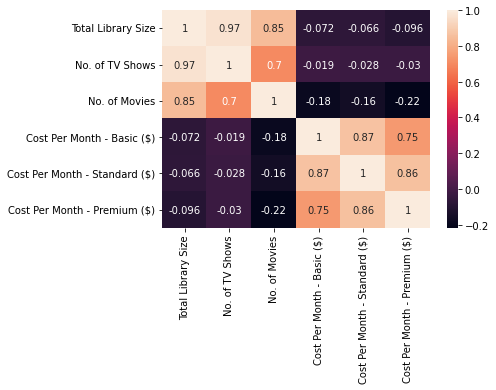

In [ ]:
sns.heatmap (datos2_3.corr(), annot = True)

In [ ]:
nombres = datos2_3.columns
filtro1 = [i for i in nombres if "Cost" in i]
filtro1.append("Country")
costos = datos2_3[filtro1]
costos.mean()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Cost Per Month - Basic ($)        8.391385
Cost Per Month - Standard ($)    12.065692
Cost Per Month - Premium ($)     15.374846
dtype: float64

In [ ]:
netflix["Country"].to_excel("netflix.xlsx")

In [ ]:
fig1.savefig("boxplot.svg")
fig2.savefig("boxplot2.svg")
fig3.savefig("boxplot3.svg")